### Project Overview
Lobster Land aims to enhance its online merchandise store's performance through various promotional strategies. In collaboration with the convenience store chain Kwik-E-Mart, three distinct promotional campaigns were conducted at multiple Kwik-E-Mart locations across Maine. Each campaign utilized unique QR codes, enabling Lobster Land to track the online merchandise revenue generated precisely through each promotional strategy.

### Data Dictionary

- **MarketID:** Unique identifier for a market.
- **MarketSize:** Size of the market area categorized by sales volume.
- **LocationID:** Unique identifier for each Kwik-E-Mart store location.
- **AgeOfStore:** The number of years since the store was established.
- **Promotion:** Identifier for one of the three tested promotions (Promotion1, Promotion2, or Promotion3).
- **Week:** Identifier for one of the four weeks during which the promotions were active.
- **SalesInThousands:** Sales revenue per row (in thousands). Each row represents a unique combination of LocationID, Promotion, and Week.

### Objective
The primary goal of this project is to provide Lobster Land with insights into the effectiveness of each promotional campaign. The analysis focuses on understanding and evaluating the impact of Promotion1, Promotion2, and Promotion3 on sales. By analyzing the `campaign_data.csv`:
- Assess the sales performance of each promotional strategy.
- Understand the influence of various factors, like market size and store age, on the effectiveness of each promotion.
- Provide recommendations on the most effective promotion for increasing sales.

### Insights & Analysis Plan
1. **Descriptive Statistics:** Understand the basic characteristics of the data, including the distribution of sales, market size, and store age.
2. **Promotional Campaign Analysis:** Evaluate the sales performance of each promotion, comparing their effectiveness in different market sizes and store ages.
3. **Hypothesis Testing:** Conduct statistical tests (pairwise t-tests) to determine if observed differences in sales across the promotions are statistically significant.
4. **Visualizations:** Develop intuitive charts and graphs to visualize sales trends and the impact of each promotional campaign.
5. **Insights & Recommendations:** Conclude with actionable insights and strategic recommendations for Lobster Land's future promotional strategies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
# Read the csv file
df_campaign = pd.read_csv('campaign_data.csv')
df_campaign

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,42.79
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,65.18
545,10,Large,920,14,2,2,60.73
546,10,Large,920,14,2,3,59.27


C:\Users\Trista Hu\AppData\Local\Temp\ipykernel_15524\658933470.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Promotion', y='SalesInThousands', data=df_campaign, ci=None)


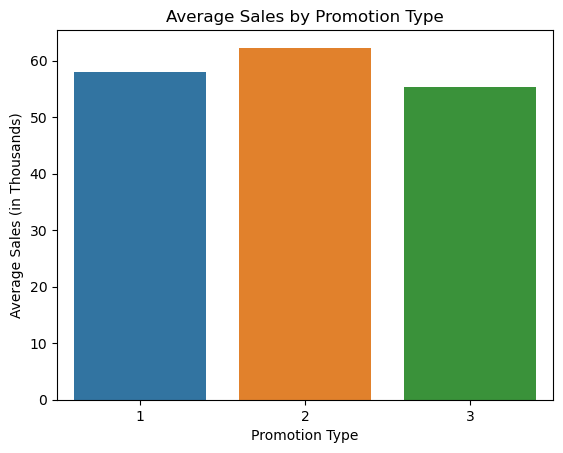

In [3]:
# Generate a barplot to show the average SalesInThousands values, separated by the different promotion types
sns.barplot(x='Promotion', y='SalesInThousands', data=df_campaign, ci=None)

plt.xlabel('Promotion Type')
plt.ylabel('Average Sales (in Thousands)')
plt.title('Average Sales by Promotion Type')

plt.show()

The barplot visualizes the average SalesInThousands values generated by each promotion type. It shows that the average sales are similar for Promotion 1 (around 58,000), Promotion 2 (around 61,000), and Promotion 3 (around 55,000).

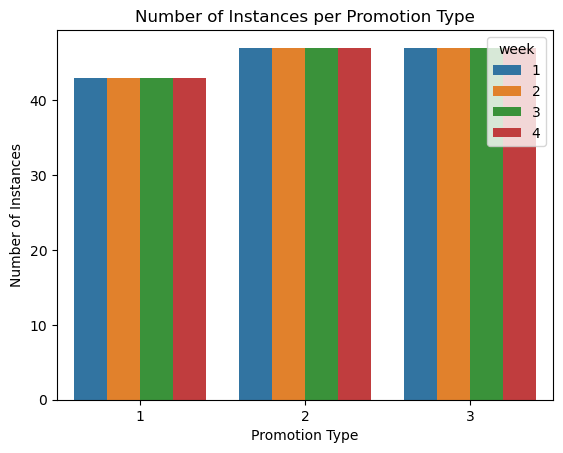

In [4]:
df_campaign['week'] = df_campaign['week'].astype('category')

sns.countplot(x='Promotion', hue='week', data=df_campaign)

plt.xlabel('Promotion Type')
plt.ylabel('Number of Instances')
plt.title('Number of Instances per Promotion Type')

plt.show()

As the gragh shows, the number of instances for each campaign is the same for every week, this suggests that the experiment design has an even distribution of promotions across time. This indicates a well-controlled experimental design where the 'week' variable is not confounded with the 'PromotionType' variable.

In [5]:
summary_stats = df_campaign.groupby('Promotion')['AgeOfStore'].describe()

print(summary_stats)

           count      mean       std  min  25%  50%   75%   max
Promotion                                                      
1          172.0  8.279070  6.636160  1.0  3.0  6.0  12.0  27.0
2          188.0  7.978723  6.597648  1.0  3.0  7.0  10.0  28.0
3          188.0  9.234043  6.651646  1.0  5.0  8.0  12.0  24.0


There are 172 stores in Promotion 1, 188 stores in Promotion 2, and 188 stores in Promotion 3. The count of stores is similar across the three groups, suggesting that the sample sizes are relatively balanced.

Overall, based on these results, it appears that the age profile of the stores does not seem to be very different across the three groups. The average sales, variability (similar Standard Deviation), and range of sales are similar, reducing the risk of age profile becoming a confounding variable to the experiment. 

In [6]:
import scipy.stats as stats

# Extract the sales values for each promotion 
sales_promo1 = df_campaign[df_campaign['Promotion'] == 1]['SalesInThousands']
sales_promo2 = df_campaign[df_campaign['Promotion'] == 2]['SalesInThousands']
sales_promo3 = df_campaign[df_campaign['Promotion'] == 3]['SalesInThousands']

# Perform pairwise t-tests
t_statistic_1_vs_2, p_value_1_vs_2 = stats.ttest_ind(sales_promo1, sales_promo2)
t_statistic_2_vs_3, p_value_2_vs_3 = stats.ttest_ind(sales_promo2, sales_promo3)
t_statistic_1_vs_3, p_value_1_vs_3 = stats.ttest_ind(sales_promo1, sales_promo3)

print("Promotion 1 vs. Promotion 2:")
print("T-Statistic:", t_statistic_1_vs_2)
print("P-Value:", p_value_1_vs_2)

print("\nPromotion 2 vs. Promotion 3:")
print("T-Statistic:", t_statistic_2_vs_3)
print("P-Value:", p_value_2_vs_3)

print("\nPromotion 1 vs. Promotion 3:")
print("T-Statistic:", t_statistic_1_vs_3)
print("P-Value:", p_value_1_vs_3)

Promotion 1 vs. Promotion 2:
T-Statistic: -2.5230805833394934
P-Value: 0.012065595012565785

Promotion 2 vs. Promotion 3:
T-Statistic: 4.2191398016523785
P-Value: 3.0807459102757044e-05

Promotion 1 vs. Promotion 3:
T-Statistic: 1.5551383687293547
P-Value: 0.12079667272313273


**Comparative Analysis of Promotions:**  
Promotion 1 vs. Promotion 2:
A negative t-statistic of -2.523 implies that, on average, Promotion 1 yields lower sales than Promotion 2, indicating the superior performance of Promotion 2 in generating sales. With a p-value of 0.0121, which is below the standard significance level of 0.05, we have substantial evidence to affirm that the difference in the means of Promotion 1 and Promotion 2 is statistically significant.

Promotion 2 vs. Promotion 3:
A positive t-statistic of 4.219 indicates that Promotion 2 has a higher mean sales compared to Promotion 3. This significant t-statistic reveals a substantial discrepancy between the two promotions. With an exceedingly low p-value (3.08e-05), there is compelling evidence to reject the null hypothesis, concluding that Promotion 2 is markedly more effective than Promotion 3 in sales generation.

Promotion 1 vs. Promotion 3:
With a t-statistic of 1.555, there's a slight difference in mean sales between Promotion 1 and Promotion 3. However, given that the p-value of 0.1208 exceeds the 0.05 significance level, we cannot claim this difference as statistically significant. Thus, there's inadequate evidence to ascertain a significant difference in sales performance between Promotion 1 and Promotion 3.

Conclusion:
Promotion 2 emerges as the most effective strategy for revenue generation amongst the three. Therefore, it is recommended that the company should either continue with or derive inspiration from Promotion 2 for future campaigns.